In [2]:
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cmath

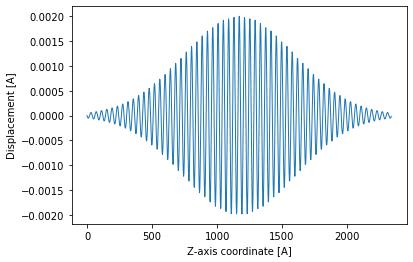

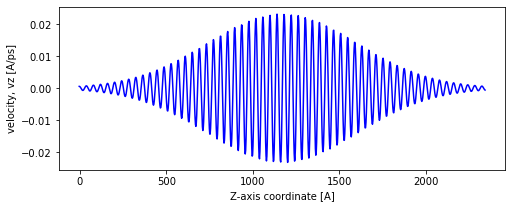

Input paramters:
k-value: 0.2
Selected frequency: 1.8431261603104498 THz
Lattice parameter: 4.079016 Ang
Center of wave packet: 1170.2021429346732


In [45]:

# Value of variables:
A = 0.002                         # range from 0.015 - 0.15 A
eps_k = 1                         # Polarization vector
a0 = 4.079016                     # a = lattice parameter, in A
val = 2

k_val = np.arange(0.0, 1.1, 0.1)

# Selecting lattice type:
a = a0                       # Case-1     
# a = a0*np.sqrt(3)            # Case-2
# a = a0/np.sqrt(3)              # Case-3

k0 = k_val[val]*np.pi/a        # wave vector, k0 = 0.9*pi/a

LA_freq = np.array([0.00,925461626247.93,1843126160310.45,2741039078132.37,3600698718147.45,
                    4397269403736.85,5102035424373.30,5685976180599.75,6123273156203.04,
                    6393976302314.61,6485618869485.52])

w_LA = 2*np.pi*LA_freq[val]           # in Hz, LA freq corresponding to k0 = 0.9*pi/a

xn = np.linspace(-2.60074, 2340.65, 996)        # Total distance in A

# with open("Au_layers.txt", "r") as file:   
#     lines = file.readlines()
# xn = np.array([list(map(float, line.strip().split())) for line in lines])
# xn = xn.reshape(-1)
x0 = xn[xn.shape[0]//2]         # middle of the Au layer, for 2600 A


# For a0
zeta = 150*a0                      # spatial extent
y = 0 + k0*(xn - x0)*1j
disp0 = A*eps_k*np.exp(-(xn - x0)**2/zeta**2)*np.exp(y)

# Plot the position
U0 = np.real(disp0)

plt.plot(xn, U0, '-', markersize=2, linewidth=1, label='a0')

plt.xlabel("Z-axis coordinate [A]")
plt.ylabel("Displacement [A]")
# plt.axhline(0.002, color='k', ls='--')
# plt.axhline(-0.002, color='k', ls='--')
# plt.xlim(800, 1800)
# plt.ylim(-0.3, 0.3)
# plt.legend()
plt.savefig("Displacement.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

fig = plt.figure(figsize=(8,3))
# Plot the velocity
vz0 = (w_LA*np.imag(disp0))/1e12    # A/ps

plt.plot(xn, vz0, 'b-', markersize=2, linewidth=1.5, label='a0')
plt.xlabel("Z-axis coordinate [A]")
plt.ylabel("velocity, vz [A/ps]")
# plt.xlim(1500, 2500)
# plt.ylim(-0.3, 0.3)
# plt.axhline(0.045, color='k', ls='--')
# plt.axhline(-0.045, color='k', ls='--')
# plt.legend()
plt.savefig("Velocity.png", dpi= 500, bbox_inches = 'tight', facecolor="w")
plt.show()

print('Input paramters:')
print('k-value:', k_val[val])
print('Selected frequency:', LA_freq[val]/1e12, 'THz')
print('Lattice parameter:', a, 'Ang')
print('Center of wave packet:', x0)

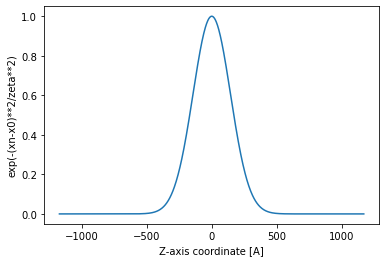

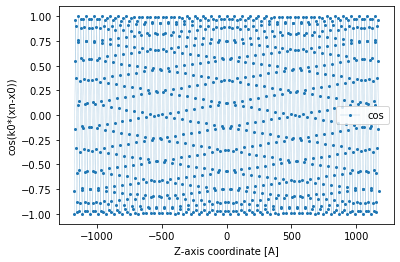

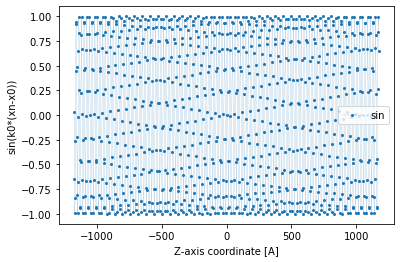

In [4]:
ex = np.exp(-(xn-x0)**2/zeta**2)

k0 = k_val[val]*np.pi/a

# plot exp part:
plt.plot(xn-x0, ex)
plt.xlabel("Z-axis coordinate [A]")
plt.ylabel("exp(-(xn-x0)**2/zeta**2)")
plt.savefig("Exponential.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

#Real part of U:
U_cos = np.cos(k0*(xn-x0))
U_real = U_cos*ex

# Imaginary part of U:
U_sin = np.sin(k0*(xn-x0))
U_img = U_sin*ex

# Plotting:
plt.plot(xn-x0, U_cos, 'o--', markersize=2, linewidth=0.2, label='cos')
plt.xlabel("Z-axis coordinate [A]")
plt.ylabel("cos(k0*(xn-x0))")
plt.legend()
plt.savefig("cos.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

xnew = np.linspace(-2.60074, 2340.65, 2000)
x0new = xnew[xnew.shape[0]//2]
U_sinnew = np.sin(k0*(xnew-x0new))

# Plotting:
# plt.plot(xnew-x0new, U_sinnew, '*',label='sin_3000 planes')
plt.plot(xn-x0, U_sin, 'o--', markersize=2, linewidth=0.2, label='sin')
plt.xlabel("Z-axis coordinate [A]")
plt.ylabel("sin(k0*(xn-x0))")
# plt.xlim(1000, 1400)
plt.legend()
plt.savefig("sin.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()


In [206]:
# xn = np.linspace(-2.6, 10, 100)        # Total distance in A
# plt.plot(xn, np.sin(xn), label='100 planes')
# xn0 = np.linspace(-2.6, 10, 5)        # Total distance in A
# plt.plot(xn0, np.sin(xn0), label='5 planes')
# plt.legend()
# plt.savefig("few_planes_problem.png", dpi= 200, bbox_inches = 'tight', facecolor="w")
# plt.show()